# **Project Topic: Student Adaptability Level - Online Data and Collected data From Ashesi University**

This project is divided into two parts.
1. Training and testing of data from collected data
2. Training and testing of data from Online dataset- Kaggle

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/students_adaptability_level.csv')
data.head()

,ID,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,2,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,3,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,4,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,5,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   1205 non-null   int64 
 1   Gender               1205 non-null   object
 2   Age                  1205 non-null   object
 3   Education Level      1205 non-null   object
 4   Institution Type     1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Load-shedding        1205 non-null   object
 8   Financial Condition  1205 non-null   object
 9   Internet Type        1205 non-null   object
 10  Network Type         1205 non-null   object
 11  Class Duration       1205 non-null   object
 12  Self Lms             1205 non-null   object
 13  Device               1205 non-null   object
 14  Adaptivity Level     1205 non-null   object
dtypes: int64(1), object(14)
memory usage: 141.3+ KB


In [50]:
# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop(['ID', 'Adaptivity Level'], axis=1)
y = data['Adaptivity Level']

# Encoding the target variable
y = LabelEncoder().fit_transform(y)

# # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Decision Tree**

Decision tree  is a flow chart of information or tree chart. It split the data that we want to predict; thus dividing the diferent target into different subgroups. Therefore for this project , it divided the adaptability level into high, low or moderate. Therefore the decision tree will have three main subgroups; one group which has **high adaptivity**, other group having **moderate adaptivity** and the third group having **low adaptivity.**

**Component of Decision Tree**
Since decision tree has 4 main parts;
1. **Root node** : Starting node that begins the splitting by finding the best value the can best split the target variable.
2. **Node purity** : Since our decision node will be mixture of different information, that means it is not that pure for decision prediction. Therefore since we want class for only low, only high, there is the need for pure node.
3. **Decision node** : It involves splitting the node into subgroups again.
4. **Leaf node** : This is what will be used for mading the predictions.

Therefore the function that were created had four main components.
Decision tree can be done in different ways thus ;
1. Greedy top down approach : the algorithm evaluates all the variables and chooses that one that best fits the criteria.
2. Variable Selection criteria : This is the where the complexity of the decision lies. As the variables are selected based on difficult statistical decisions. This can be done in two ways;

1. Entropy and information gain
2. Gini Index

But for this project **Entropy and information gain** was use. But all these two methods are similar as both tries to find the variable that is best fit for the project.



# EXPLANATION OF THE CODE
1. **Entropy function** : So it first findthe probability of randomly selecting an example. So since the total adaptability levels for is 1205, in case the total number  of high is 600, low is 405 and moderate is 200. It will finding the probability for each parts;

probability of low = 405 /1205

probability for moderate = 200/1205

probability of high = 405/ 1205
Formula for entropy; 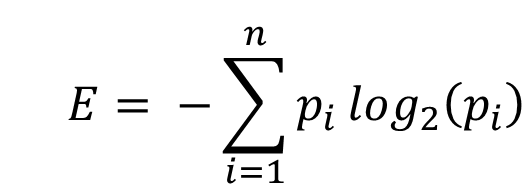

**pi** is the probability of randomly selecting example class from i

**parent node calculation** was calculated from the information gain,
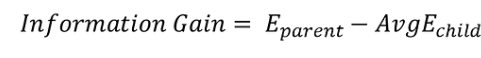

2. Node ; This is the creation of the node, thus setting the node parts, thus right, left, the features it will contain and its threshold.

3. Decision class ;  Which is were the decision tree decision is done.
3. Based on the best criteria used to proceed with the decision then prediction were done.
After that the predicted and the true data was used to find the accuracy of the mode.


# OVERFITTING AND DECISION TREE
overfitting is a potential thing that can happen to our model. As it was realised that the algorithm continues to split  till it reaches the leaf node.

There are alot of method to prevent this, the three most common are;
1. Pre pruning or early stopping
2. Post pruning or late stopping
3. Ensembling or using average from several models like in random forest.

But the ones used in the code was the Pre pruning or early stopping

1.  **Pre pruning or early stopping**: This was then by doing hyperparameter tunning of the decision tree prior to the training pipeline. Since we are doing from scratch.
we created the sklearn function for this by creating a function called **DecisionTree** which has this initialization thus **(max_depth,min_sample_leaf, min_sample_split)** this was done by implementing the GridSeachCV from scratch as well.

In [27]:
def entropy(variable):
    distribution = np.bincount(variable)
    Pi = distribution / len(variable)
    return -np.sum([p * np.log2(p) for p in Pi if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

  # Checking if is a node, if it is return it is not empty
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, num_feature=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.num_feature = num_feature
        self.rootNode = None

    def fit(self, X, y):
        self.num_feature = X.shape[1] if not self.num_feature else min(self.num_feature, X.shape[1])
        self.rootNode = self._expand_tree(X, y)

    def to_predict(self, X):
        return np.array([self._traverse_tree(x, self.rootNode) for x in X])

    def _expand_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        # Exiting the criteria to select the best target or variable
        if (
            depth >= self.max_depth
            or num_labels == 1
            or num_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_indices = np.random.choice(num_features, self.num_feature, replace=False)

        # Selection of the best split using the greedtop down approach according to information gain approach
        best_target, best_threshold = self._best_criteria(X, y, feat_indices)

        # grow the children that result from the split
        left_indices, right_indices = self._split(X[:, best_target], best_threshold)
        left = self._expand_tree(X[left_indices, :], y[left_indices], depth + 1)
        right = self._expand_tree(X[right_indices, :], y[right_indices], depth + 1)
        return Node(best_target, best_threshold, left, right)

    def _best_criteria(self, X, y, feat_indices):
        best_gain = -1
        split_index, split_threshold = None, None
        for feat_idx in feat_indices:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_index = feat_idx
                    split_threshold = threshold

        return split_index, split_threshold

    def _information_gain(self, y, X_column, split_threshold):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_indices, right_indices = self._split(X_column, split_threshold)

        if len(left_indices) == 0 or len(right_indices) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_indices), len(right_indices)
        e_l, e_r = entropy(y[left_indices]), entropy(y[right_indices])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        informationGain = parent_entropy - child_entropy
        return informationGain

    def _split(self, X_column, split_threshold):
        left_indices = np.argwhere(X_column <= split_threshold).flatten()
        right_indices = np.argwhere(X_column > split_threshold).flatten()
        return left_indices, right_indices

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


After running the decision tree, checking for the accuracy from the predicted values.

In [28]:
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state= 42
    )

    clf = DecisionTree(max_depth=10)
    clf.fit(X_train, y_train)

    y_pred = clf.to_predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy of Decision Tree:", acc)


Accuracy of Decision Tree: 0.9473684210526315


In [29]:
# LLM was used to test this part of the work
import random
def train_test_split(X, y, test_size=0.2, random_state=42):
    # Set the random seed for reproducibility
    random.seed(random_state)

    # Calculate the number of test samples
    num_test_samples = int(len(X) * test_size)

    # Generate a list of indices and shuffle it
    indices = list(range(len(X)))
    random.shuffle(indices)

    # Split indices into test and train indices
    test_indices = indices[:num_test_samples]
    train_indices = indices[num_test_samples:]

    # Split the data based on the indices
    X_train = [X[i] for i in train_indices]
    y_train = [y[i] for i in train_indices]
    X_test = [X[i] for i in test_indices]
    y_test = [y[i] for i in test_indices]

    return X_train, X_test, y_train, y_test

**Method Two - Random Forest Classification**
After creating the decision tree, it was used to do the random forest code.
It behaves like a decision tree within a random tree. The motive for the random forest is to have a tree that has different data from each other. For each split consideration, grouping were done twice. As one side has a larger part and the other had a smaller part. After that further splitting were done to each node. Then from that the prediction was done and it was used to find the accuracy.

Explanation of the random forest code

In [79]:
# some help were gotten from online searching
from collections import Counter

import numpy as np


def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)


In [81]:

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state= 42
    )

    clf = RandomForest(n_trees=3, max_depth=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accurate = accuracy(y_test, y_pred)

    print("Accuracy for Random Forest - Online dataset:", accurate)

Accuracy for Random Forest - Online dataset: 0.9473684210526315


# Collected data from Google Forming Machine learning Training
After testing the model with data which was gotten from kaggle. Data were collected from Ashesi students to know how they adapted to online learning during the COVID time which is kind of the same as the data which was collected from the kaggle website.

From df.info, the data information can be found. But because the data columns had some similarities and difference. Data merging could not be done as we did not want to misintepret the information or insights we are trying to communicate.
**Note: The same mode was used to train the system.**

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter

df = pd.read_excel('/content/Data Science Group (Responses).xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Timestamp                      40 non-null     datetime64[ns]
 1   Education Level                40 non-null     object        
 2   Institution Type               40 non-null     object        
 3   Age Group                      40 non-null     object        
 4   Program                        40 non-null     object        
 5   Internet Type                  40 non-null     object        
 6   financial aid                  40 non-null     object        
 7   AffordData                     39 non-null     object        
 8    network type                  40 non-null     object        
 9   Load-shedding                  40 non-null     object        
 10  duration                       40 non-null     object        
 11   Online Self-Learning

# **WHY WE DID NOT PERFORM DATA CLEANING**
After collecting the data, all are respondent fill in the data. Therefore they was no need for doing data cleaning. But if there was a need for it , this will have been how we will have implemented it.

**DATA CLEANING**
1. Drop duplicate
2. Handle the Null value or the empty columns with either using statistical method like the mean.
3. Or droping the row that has missing data.
4. Filling in the missing data with some logical values after performing some analysis.

In [60]:
# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(data[column])

X = df.drop(['Timestamp', 'Adaptability Level'], axis=1)
y = df['Adaptability Level']

# Encoding the target variable
y = LabelEncoder().fit_transform(y)

# # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
def entropy(variable):
    distribution = np.bincount(variable)
    Pi = distribution / len(variable)
    return -np.sum([p * np.log2(p) for p in Pi if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

  # Checking if is a node, if it is return it is not empty
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, num_feature=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.num_feature = num_feature
        self.rootNode = None

    def fit(self, X, y):
        self.num_feature = X.shape[1] if not self.num_feature else min(self.num_feature, X.shape[1])
        self.rootNode = self._expand_tree(X, y)

    def to_predict(self, X):
        return np.array([self._traverse_tree(x, self.rootNode) for x in X])

    def _expand_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        # Exiting the criteria to select the best target or variable
        if (
            depth >= self.max_depth
            or num_labels == 1
            or num_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_indices = np.random.choice(num_features, self.num_feature, replace=False)

        # Selection of the best split using the greedtop down approach according to information gain approach
        best_target, best_threshold = self._best_criteria(X, y, feat_indices)

        # grow the children that result from the split
        left_indices, right_indices = self._split(X[:, best_target], best_threshold)
        left = self._expand_tree(X[left_indices, :], y[left_indices], depth + 1)
        right = self._expand_tree(X[right_indices, :], y[right_indices], depth + 1)
        return Node(best_target, best_threshold, left, right)

    def _best_criteria(self, X, y, feat_indices):
        best_gain = -1
        split_index, split_threshold = None, None
        for feat_idx in feat_indices:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_index = feat_idx
                    split_threshold = threshold

        return split_index, split_threshold

    def _information_gain(self, y, X_column, split_threshold):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_indices, right_indices = self._split(X_column, split_threshold)

        if len(left_indices) == 0 or len(right_indices) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_indices), len(right_indices)
        e_l, e_r = entropy(y[left_indices]), entropy(y[right_indices])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        informationGain = parent_entropy - child_entropy
        return informationGain

    def _split(self, X_column, split_threshold):
        left_indices = np.argwhere(X_column <= split_threshold).flatten()
        right_indices = np.argwhere(X_column > split_threshold).flatten()
        return left_indices, right_indices

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


In [66]:
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state= 42
    )

    clf = DecisionTree(max_depth=10)
    clf.fit(X_train, y_train)

    y_pred = clf.to_predict(X_test)
    accurate = accuracy(y_test, y_pred)

    print("Accuracy of Decision Tree from collected data:", accurate)


Accuracy of Decision Tree from collected data: 0.9385964912280702


# **[Random Forest Model - Collected Data ](https://)**

In [72]:
#Some help were gotten from online searching
from collections import Counter

import numpy as np


def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)


In [76]:

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state= 42
    )

    clf = RandomForest(n_trees=3, max_depth=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)
    print("Accuracy for random forest for collected data:", acc)

Accuracy for random forest for collected data: 0.9473684210526315


**Downloading the Model after training and testing**

In [ ]:
# All these is from LLM
from joblib import load
from joblib import dump
from google.colab import files

# Save the model to a file
dump(clf, 'random_forest_model.joblib')

# Load the model from the file
clf = load('random_forest_model.joblib')


# Download the model file
files.download('random_forest_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>